In [42]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression , perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


# Load (train,test and gender_submission) dataset 

In [43]:
train =pd.read_csv('C:/Users/DELL/Desktop/Python GUI/Datascience/tatanic/train.csv')
test = pd.read_csv('C:/Users/DELL/Desktop/Python GUI/Datascience/tatanic/test.csv')
ss = pd.read_csv('C:/Users/DELL/Desktop/Python GUI/Datascience/tatanic/gender_submission.csv')

# show all featuers tran dataset

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train.shape


(891, 12)

In [46]:
test.shape

(418, 11)

In [47]:
ss.shape

(418, 2)

In [48]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# explain information about train dataset

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# find which featuers includes null values

In [50]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [51]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

# visualize the distribution of NaN values

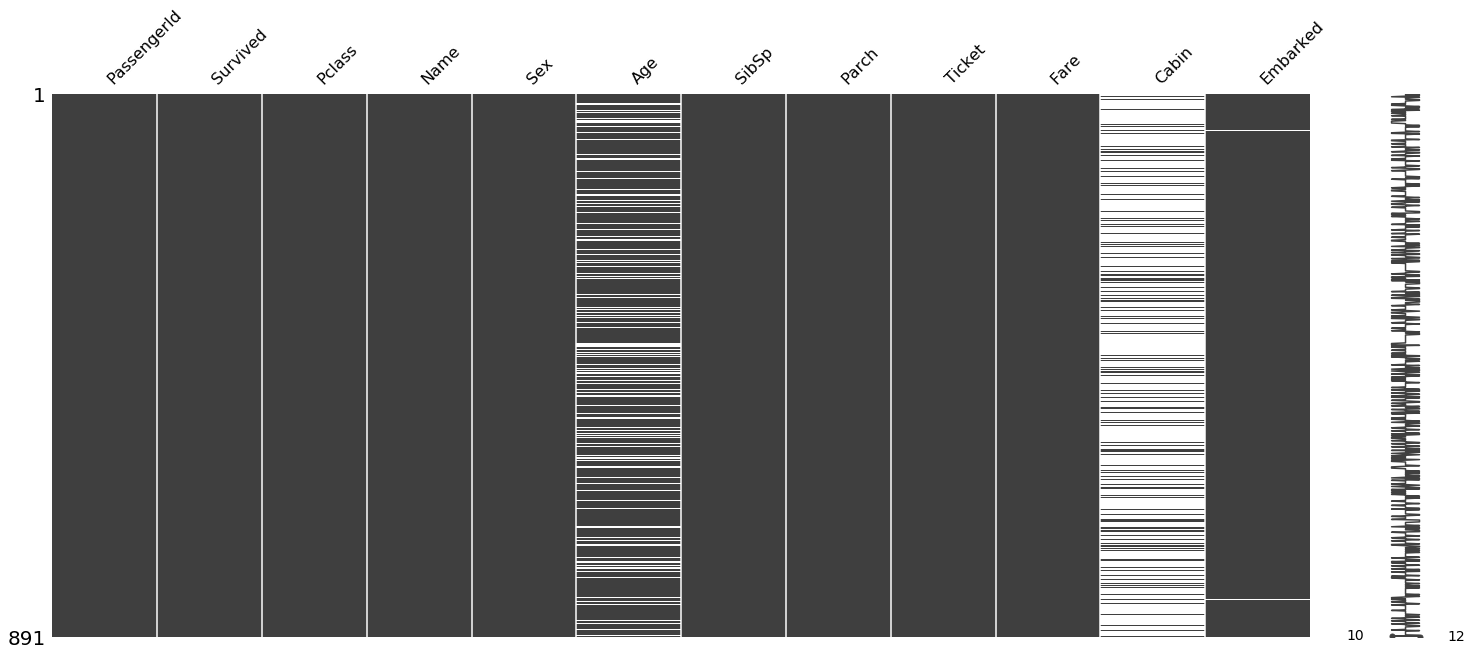

In [52]:
missingno.matrix(train)

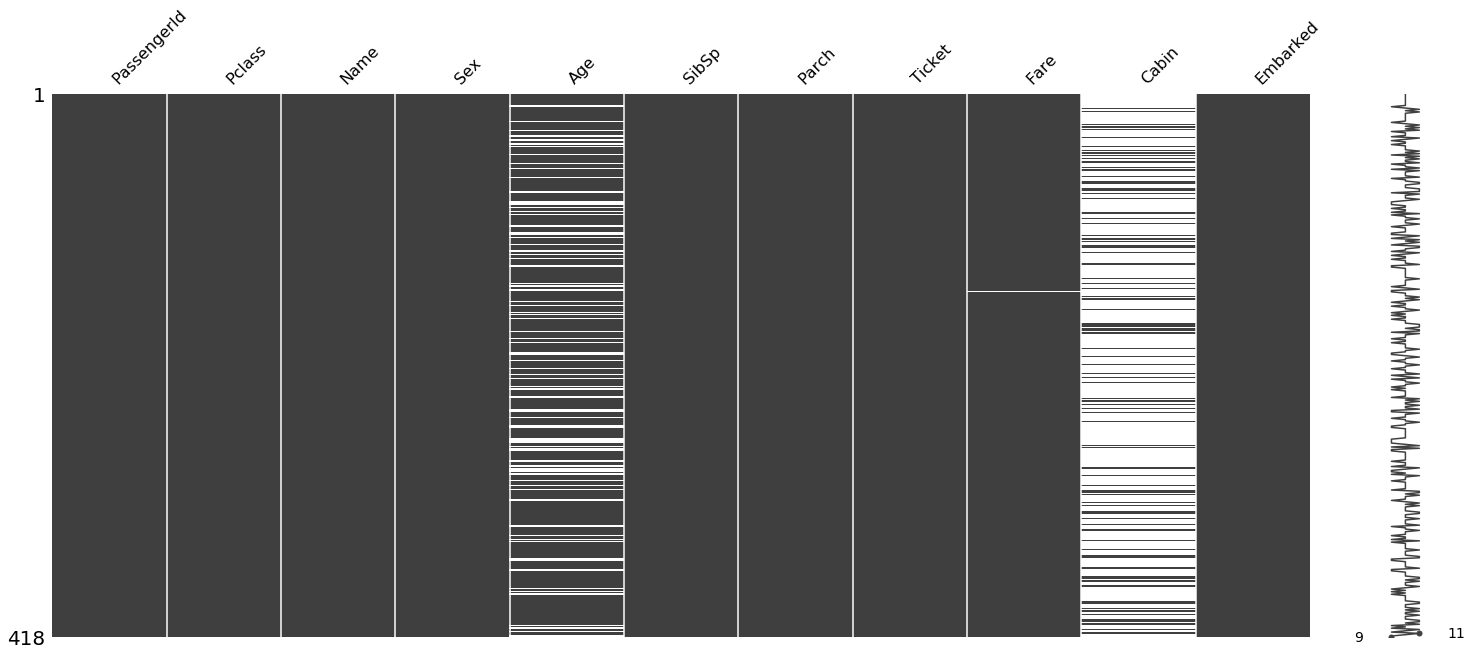

In [53]:
missingno.matrix(test)

# a summary of statistics pertaining to the DataFrame columns.

In [54]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [56]:
train['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [57]:
train[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# shows the relationship between a numeric and a categoric variable

Text(0.5, 1.0, 'Survived probablity by Gender')

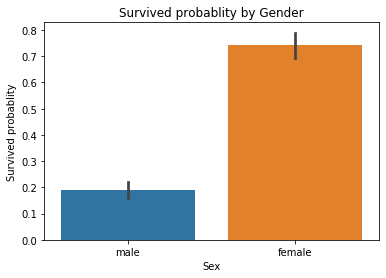

In [58]:
sns.barplot(x='Sex' , y='Survived',data = train)
plt.ylabel('Survived probablity')
plt.title('Survived probablity by Gender')

In [59]:
train['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [60]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'survived probablity by passenger class')

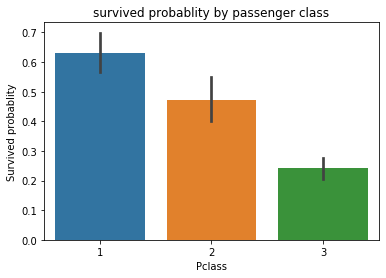

In [61]:
sns.barplot(x='Pclass',y='Survived',data=train)
plt.ylabel('Survived probablity')
plt.title('survived probablity by passenger class')

In [ ]:
#show Survived Passsenger in each Pclass by Sex

Text(0.5, 1, 'Survived probablity by sex and passenger class')

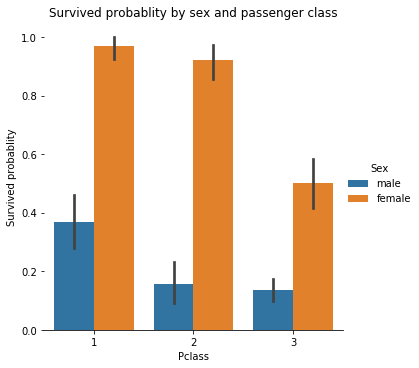

In [62]:
g = sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=train, kind='bar')
g.despine(left = True)
plt.ylabel('Survived probablity')
plt.title('Survived probablity by sex and passenger class')

In [63]:
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [64]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
#show survived passenger in Embarked featuer

Text(0.5, 1.0, 'Survived probablity by point embarketion')

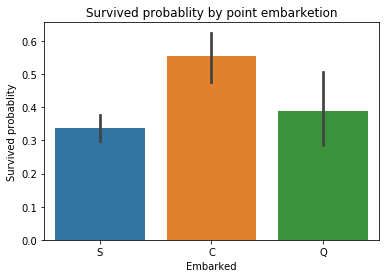

In [65]:
sns.barplot(x='Embarked',y='Survived',data=train)
plt.ylabel('Survived probablity')
plt.title('Survived probablity by point embarketion')

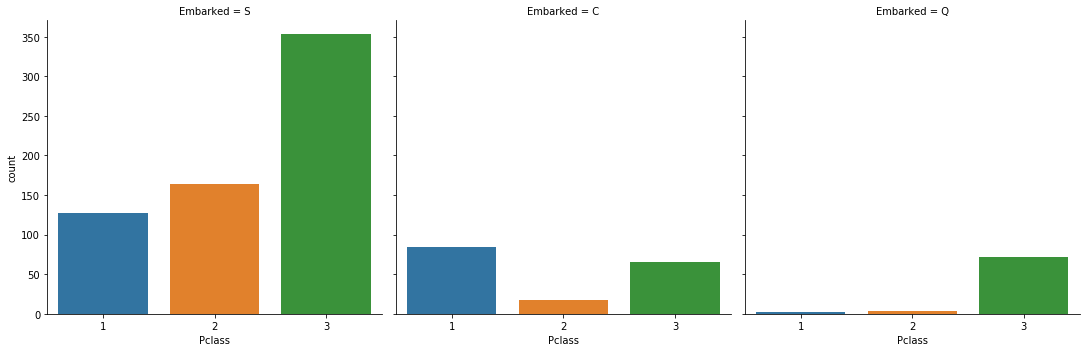

In [66]:
sns.factorplot('Pclass',col='Embarked',data=train, kind='count')

# Detecting Outlier

In [67]:
def detect_outliers(df, n, features):
    
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items()
                                 if value > n)
    return multiple_outliers
outlier_to_drop = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])
print('we will drop {} this indices:'.format(len(outlier_to_drop)), outlier_to_drop)

we will drop 10 this indices: [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [68]:
train.loc[outlier_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [69]:
print('Befor: {} rows'.format(len(train)))
train = train.drop(outlier_to_drop, axis=0).reset_index(drop=True)
print('After: {} rows'.format(len(train)))

Befor: 891 rows
After: 881 rows


In [1]:
#show relationship between numric attributes 

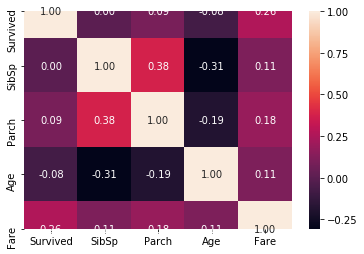

In [70]:
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(),annot=True,
           fmt = '.2f')

In [71]:
train['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [72]:
train[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


# Survived probablity by SibSp

Text(0.5, 1.0, 'Survived probablity by SibSp')

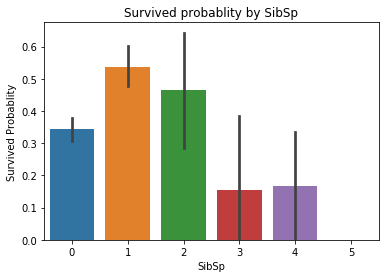

In [73]:
sns.barplot(x = 'SibSp',y='Survived',data=train)
plt.ylabel('Survived Probablity')
plt.title('Survived probablity by SibSp')

In [74]:
train['Parch'].value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [75]:
train[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survived probablity by SibSp')

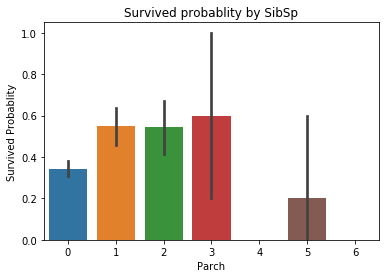

In [76]:
sns.barplot(x = 'Parch',y='Survived',data=train)
plt.ylabel('Survived Probablity')
plt.title('Survived probablity by SibSp')

In [77]:
train['Age'].isnull().sum()

170

In [78]:
#sns.distplot(train['Age'], label='Skewness: %.2f'%(train['Age'].skew()))
#plt.legend(loc = 'best')
#plt.title('Passenger Age Distrbution')

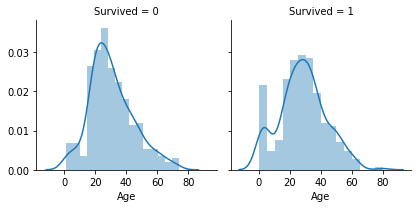

In [79]:
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot,'Age')

Text(0.5, 1.0, 'Passenger Age Distrbution by Survived')

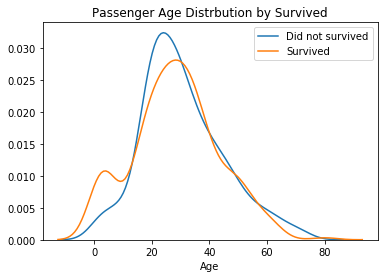

In [80]:
sns.kdeplot(train['Age'][train['Survived'] ==0], label = 'Did not survived')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distrbution by Survived')

In [81]:
train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger fare Distrbution')

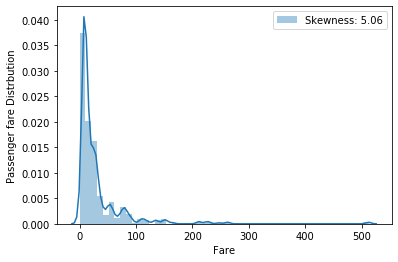

In [82]:
sns.distplot(train['Fare'], label='Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger fare Distrbution')

In [83]:
train = train.drop(['Ticket','Cabin'], axis=1)
test = test.drop(['Ticket','Cabin'],axis=1)

In [84]:
train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [85]:
mode = train['Embarked'].dropna().mode()[0]

In [86]:
train['Embarked'].fillna(mode, inplace=True)

In [87]:
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
Embarked        0
Parch           0
SibSp           0
Sex             0
Name            0
Pclass          0
PassengerId     0
dtype: int64

In [88]:
#find median for Fare featuer in the test data set
median = test['Fare'].dropna().median()
median

14.4542

In [89]:
#fill Fare null value  in the test dataset
test['Fare'].fillna(median, inplace=True)

In [90]:
#combine (train) and (test) dataset then create new dataset by name(combine)
combine = pd.concat([train,test],axis=0).reset_index(drop=True)
combine.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0


In [91]:
#detect null values in (combine) dataset
combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
SibSp            0
Sex              0
Pclass           0
PassengerId      0
Parch            0
Name             0
Fare             0
Embarked         0
dtype: int64

In [92]:
#change (sex) featuer  to numric
combine['Sex'] = combine['Sex'].map({'male':0,'female':1})

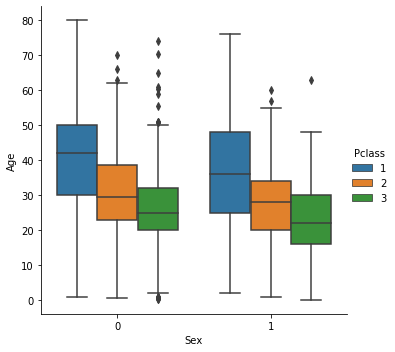

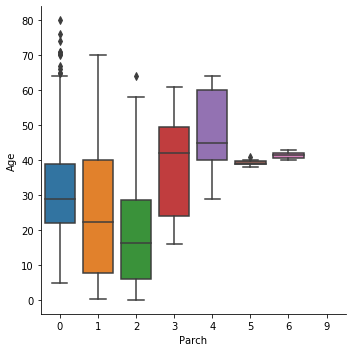

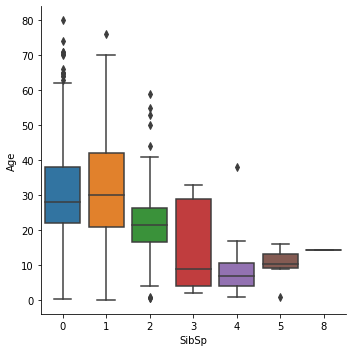

In [93]:
# show the relationship between a numerical and categorical variables
sns.catplot(y='Age', x='Sex', hue='Pclass',kind='box',data=combine)
sns.catplot(y='Age',x='Parch',kind='box',data=combine)
sns.catplot(y='Age',x='SibSp',kind='box',data=combine)

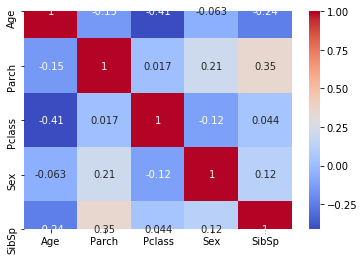

In [94]:
#heatmap use to indicate a relationship between features
sns.heatmap(combine.drop(['Survived','Name','PassengerId','Fare'],axis=1).corr(),annot=True,cmap='coolwarm')

In [95]:
#show number of null values in age feature 
age_nan_indecs = list(combine[combine['Age'].isnull()].index)
len(age_nan_indecs)

256

# fill null values by median

In [96]:

for index in age_nan_indecs:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp']==combine.iloc[index]['SibSp'])
                                &(combine['Parch']== combine.iloc[index]['Parch'])
                                &(combine['Pclass']== combine.iloc[index]['Pclass'])].median()
    
    if np.isnan(predict_age):
        combine['Age'].iloc[index]=median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [97]:
combine['Age'].isnull().sum()

0

Text(0.5, 1.0, 'Passenger fare Distrbution')

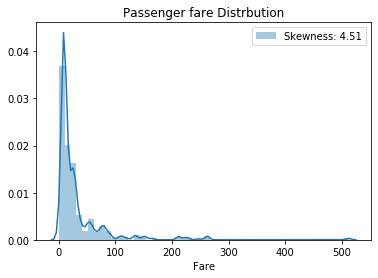

In [98]:
#display distrbution Fare column data 
sns.distplot(combine['Fare'], label='Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger fare Distrbution')

In [99]:
#obtain log each index Fare feature if log greater than 0 put same value else 0
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passengrer fare Distrbution after log transformasion')

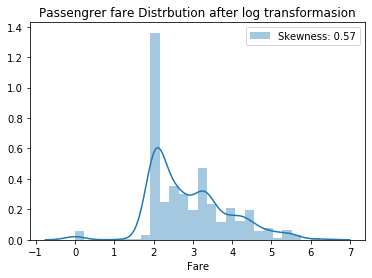

In [100]:
#Passengrer fare Distrbution after log transformasion
sns.distplot(combine['Fare'],label='Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passengrer fare Distrbution after log transformasion')

In [101]:
#separate title each name
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [102]:
combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Don               1
the Countess      1
Jonkheer          1
Lady              1
Dona              1
Capt              1
Mme               1
Sir               1
Name: Title, dtype: int64

In [103]:
combine['Title'].nunique()

18

In [104]:
combine['Title'] = combine['Title'].replace(['Dr','Rev','Col','Major','Lady','Jonkher','Don','Capt','the countess'
                                           'sir','Dona' ],'Rare')

combine['Title']= combine['Title'].replace(['Mlle','Ms'],'Miss')
combine['Title'] = combine['Title'].replace('Mme','Mrs')

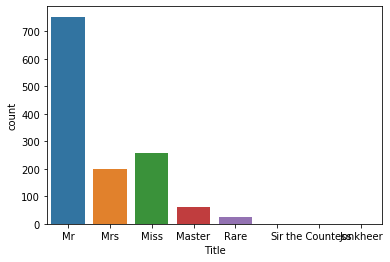

In [105]:
sns.countplot(combine['Title'])

In [106]:
combine[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
6,Sir,1.000000
7,the Countess,1.000000
4,Mrs,0.793651
2,Miss,0.711111
1,Master,0.589744
5,Rare,0.300000
3,Mr,0.157895
0,Jonkheer,0.000000


Text(0.5, 1, 'Mean of survived by title')

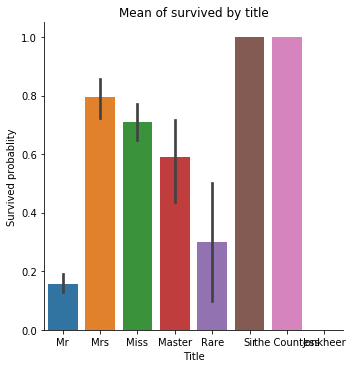

In [107]:
#Display rate survived title column
sns.factorplot(x = 'Title',y='Survived',data=combine,kind='bar')
plt.ylabel('Survived probablity')
plt.title('Mean of survived by title')

In [108]:
#delet Name feature
combine = combine.drop('Name',axis=1)
combine.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,S,1.981001,0,1,3,0,1,0.0,Mr
1,38.0,C,4.266662,0,2,1,1,1,1.0,Mrs
2,26.0,S,2.070022,0,3,3,1,0,1.0,Miss
3,35.0,S,3.972177,0,4,1,1,1,1.0,Mrs
4,35.0,S,2.085672,0,5,3,0,0,0.0,Mr


In [109]:
#create new column name FamilySize
combine['FamilySize'] = combine['SibSp']+combine['Parch']+1
combine[['SibSp','Parch','FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [110]:
#show rate survived by FamilySize
combine[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [111]:
#if familySize = 1 put 1 otherwise 0 
combine['IsAlone']=0
combine.loc[combine['FamilySize'] == 1,'IsAlone']=1

In [112]:
combine[['IsAlone','Survived']].groupby('IsAlone',as_index=False).mean().sort_values(by='Survived',ascending=False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [113]:
#combine = combine.drop(['SibSp','Parch','FamilySize'], axis=1)
combine.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,FamilySize,IsAlone
0,22.0,S,1.981001,0,1,3,0,1,0.0,Mr,2,0
1,38.0,C,4.266662,0,2,1,1,1,1.0,Mrs,2,0
2,26.0,S,2.070022,0,3,3,1,0,1.0,Miss,1,1
3,35.0,S,3.972177,0,4,1,1,1,1.0,Mrs,2,0
4,35.0,S,2.085672,0,5,3,0,0,0.0,Mr,1,1


In [114]:
combine['AgeBand'] = pd.cut(combine['Age'],5)
combine[['AgeBand','Survived']].groupby('AgeBand',as_index=False).mean().sort_values(by='AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [115]:
combine.loc[combine['Age'] <= 16.136, 'Age']=0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age']=1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.06),'Age']=2
combine.loc[(combine['Age'] > 48.068) &(combine['Age'] <=64.034),'Age']=3
combine.loc[combine['Age'] > 64.034,'Age']=4

In [116]:
#delet AgeBand featuer
combine = combine.drop('AgeBand',axis=1)

In [117]:
#show datatypes (Age and Pclass) featuer
combine[['Age','Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [118]:
#change Age data type to int
combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [119]:
#create new featuer name by multipaly Age with Pclass
combine['Age*Pclass'] = combine['Age'] * combine['Pclass']
combine[['Age','Pclass','Age*Pclass']].head()

,Age,Pclass,Age*Pclass
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [120]:
combine.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,FamilySize,IsAlone,Age*Pclass
0,1,S,1.981001,0,1,3,0,1,0.0,Mr,2,0,3
1,2,C,4.266662,0,2,1,1,1,1.0,Mrs,2,0,2
2,1,S,2.070022,0,3,3,1,0,1.0,Miss,1,1,3
3,2,S,3.972177,0,4,1,1,1,1.0,Mrs,2,0,2
4,2,S,2.085672,0,5,3,0,0,0.0,Mr,1,1,6


In [121]:
#change title and Embarked featuer to categorical featuer 
combine = pd.get_dummies(combine, columns=['Title'])
combine = pd.get_dummies(combine, columns=['Embarked'],prefix='Em')
combine.head()


,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,FamilySize,IsAlone,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
0,1,1.981001,0,1,3,0,1,0.0,2,0,...,0,0,1,0,0,0,0,0,0,1
1,2,4.266662,0,2,1,1,1,1.0,2,0,...,0,0,0,1,0,0,0,1,0,0
2,1,2.070022,0,3,3,1,0,1.0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,2,3.972177,0,4,1,1,1,1.0,2,0,...,0,0,0,1,0,0,0,0,0,1
4,2,2.085672,0,5,3,0,0,0.0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [122]:
combine['FareBand']=pd.cut(combine['Fare'],5)
combine[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand')

,FareBand,Survived
0,"(-0.00624, 1.248]",0.066667
1,"(1.248, 2.496]",0.225627
2,"(2.496, 3.743]",0.431884
3,"(3.743, 4.991]",0.669118
4,"(4.991, 6.239]",0.692308


In [123]:
#put values(0,1,2,3) for fare featuer 
combine.loc[combine['Fare']<=1.56,'Fare']=0
combine.loc[(combine['Fare']>1.56)&(combine['Fare']<=3.119),'Fare']=1
combine.loc[(combine['Fare']>3.119)&(combine['Fare']<=4.679),'Fare']=2
combine.loc[combine['Fare']>4.679,'Fare']=3

In [124]:
combine['Fare'] = combine['Fare'].astype('int')

In [125]:
combine = combine.drop('FareBand',axis=1)

In [126]:
combine.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,FamilySize,IsAlone,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
0,1,1,0,1,3,0,1,0.0,2,0,...,0,0,1,0,0,0,0,0,0,1
1,2,2,0,2,1,1,1,1.0,2,0,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,3,3,1,0,1.0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,2,2,0,4,1,1,1,1.0,2,0,...,0,0,0,1,0,0,0,0,0,1
4,2,1,0,5,3,0,0,0.0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [127]:
train=combine[:len(train)]
test = combine[len(train):]

In [128]:
train.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,FamilySize,IsAlone,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
0,1,1,0,1,3,0,1,0.0,2,0,...,0,0,1,0,0,0,0,0,0,1
1,2,2,0,2,1,1,1,1.0,2,0,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,3,3,1,0,1.0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,2,2,0,4,1,1,1,1.0,2,0,...,0,0,0,1,0,0,0,0,0,1
4,2,1,0,5,3,0,0,0.0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [129]:
#delet passengerId featuer
train = train.drop('PassengerId',axis=1)
train.head()

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,FamilySize,IsAlone,Age*Pclass,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
0,1,1,0,3,0,1,0.0,2,0,3,...,0,0,1,0,0,0,0,0,0,1
1,2,2,0,1,1,1,1.0,2,0,2,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,3,1,0,1.0,1,1,3,...,0,1,0,0,0,0,0,0,0,1
3,2,2,0,1,1,1,1.0,2,0,2,...,0,0,0,1,0,0,0,0,0,1
4,2,1,0,3,0,0,0.0,1,1,6,...,0,0,1,0,0,0,0,0,0,1


In [130]:
test.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,FamilySize,IsAlone,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
881,2,1,0,892,3,0,0,NaN,1,1,...,0,0,1,0,0,0,0,0,1,0
882,2,1,0,893,3,1,1,NaN,2,0,...,0,0,0,1,0,0,0,0,0,1
883,3,1,0,894,2,0,0,NaN,1,1,...,0,0,1,0,0,0,0,0,1,0
884,1,1,0,895,3,0,0,NaN,1,1,...,0,0,1,0,0,0,0,0,0,1
885,1,1,1,896,3,1,1,NaN,3,0,...,0,0,0,1,0,0,0,0,0,1


In [131]:
#delet survived featuer in test dataset
test = test.drop('Survived',axis=1)
test.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,FamilySize,IsAlone,Age*Pclass,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Sir,Title_the Countess,Em_C,Em_Q,Em_S
881,2,1,0,892,3,0,0,1,1,6,...,0,0,1,0,0,0,0,0,1,0
882,2,1,0,893,3,1,1,2,0,6,...,0,0,0,1,0,0,0,0,0,1
883,3,1,0,894,2,0,0,1,1,6,...,0,0,1,0,0,0,0,0,1,0
884,1,1,0,895,3,0,0,1,1,3,...,0,0,1,0,0,0,0,0,0,1
885,1,1,1,896,3,1,1,3,0,3,...,0,0,0,1,0,0,0,0,0,1


In [132]:
x_train = train.drop('Survived',axis=1)
y_train = train['Survived']
x_test = test.drop('PassengerId',axis=1).copy()
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)

x_train shape (881, 20)
y_train shape (881,)
x_test shape (418, 20)


# using diffrent type Machine learning algorithem to predict dataset

In [133]:
loreg = LogisticRegression()
loreg.fit(x_train,y_train)
Y_pred = loreg.predict(x_test)
acc_log = round(loreg.score(x_train,y_train)*100,2)
acc_log

82.97

In [134]:
svc = SVC()
svc.fit(x_train,y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train,y_train)*100,2)
acc_svc

82.97

In [136]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train,y_train)*100,2)
acc_gaussian


79.34

In [137]:
from sklearn.linear_model import perceptron
perceptron = perceptron()
perceptron.fit(x_train,y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(gaussian.score(x_train,y_train)*100,2)
acc_perceptron

TypeError: 'module' object is not callable

In [143]:
linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)
Y_predic = linear_svc.predict(x_test)
acc_linearsvc = round(linear_svc.score(x_train,y_train)*100,2)
acc_linearsvc

82.63

In [144]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
Y_predict = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train,y_train)*100,2)
acc_sgd

78.89

In [145]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train,y_train)
Y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(decisiontree.score(x_train,y_train)*100,2)
acc_decisiontree

87.63

In [146]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
Y_pred = random_forest.predict(x_test)
acc_randomForest = round(random_forest.score(x_train,y_train)*100,2)
acc_randomForest

87.17

In [147]:
catboosts = CatBoostClassifier()
catboosts.fit(x_train,y_train)
Y_pred = catboosts.predict(x_test)
acc_catboost = round(decisiontree.score(x_train,y_train)*100,2)
acc_catboost

NameError: name 'CatBoostClassifier' is not defined

# chooce best parameters and best estemetor

In [148]:
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.654, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.814, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.823, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.819, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.683, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.826, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.824, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.829, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.819, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.824, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.833, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.823, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [149]:
print('Best Parameters:',grid.best_params_)
print('Best estimator:',grid.best_estimator_)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


# chooce SVC machine learning algorithem

In [150]:
svc = SVC(C = 100,gamma=0.01,kernel='rbf')
svc.fit(x_train,y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train,y_train)*100,2)
acc_svc

83.88

In [151]:
cross_val_score(svc,x_train,y_train,scoring='accuracy',cv=10).mean()

0.827464249233912

In [152]:
Y_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
len(Y_pred)

In [ ]:
ss.head()

In [ ]:
ss.shape

In [ ]:
submit = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':Y_pred})
submit.head()

In [ ]:
submit.shape

In [ ]:
submit.to_csv('C:/Users/DELL/Desktop/Python GUI/Datascience/soluthon kaggle titanic dataset/svm_titanic.csv',index=False)